In [1]:
# scvelo_developer environment
# based on https://github.com/linnykos/veloUncertainty/blob/main/code/yuhong/pancreas/methods/sct/v2_pan_sct_3plots.py
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import anndata as ad

In [2]:
method = 'sct'
dataset_long = 'pancreas'
dataset_short = 'pan'

data_folder = "/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/yuhong/data/"
fig_folder = "/home/users/kzlin/kzlinlab/projects/veloUncertainty/git/veloUncertainty/fig/yuhong/v2_"+dataset_long+"/"+method+"/"

total = scv.read(data_folder+'v2_'+dataset_long+'/'+method+'/adata_'+dataset_short+'_'+method+'_total_v2.h5ad')

In [3]:
total

AnnData object with n_obs × n_vars = 3696 × 2000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'n_genes_by_counts', 'total_counts', 'ptime'
    var: 'highly_variable_genes', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'hvg', 'neighbors', 'pca'
    obsm: 'X_TNODE', 'X_VF', 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'velocity'
    obsp: 'connectivities', 'distances'

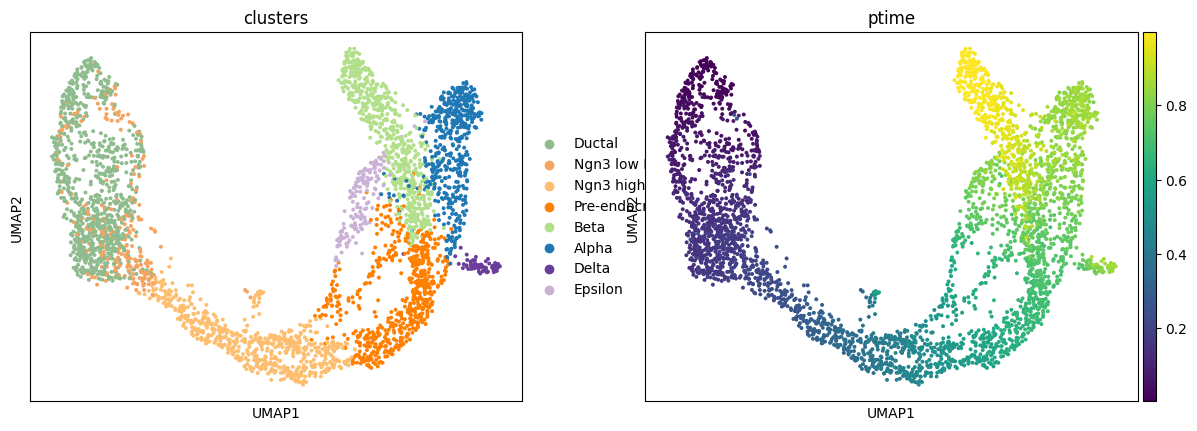

In [4]:
sc.pl.umap(
    total,
    color=["clusters", "ptime"]
)

In [5]:
# run this to avoid the "ValueError: Your neighbor graph seems to be corrupted. Consider recomputing via pp.neighbors." error in the next block
scv.pp.neighbors(total, n_neighbors=30, n_pcs=30)

computing neighbors
    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [6]:
# run this to avoid the "ValueError: You need to run `tl.velocity_graph` first to compute cosine correlations." error in the next block
scv.tl.velocity_graph(total)

computing velocity graph (using 1/20 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/home/users/kzlin/miniconda3/envs/scVelo_developer/lib/python3.9/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/users/kzlin/miniconda3/envs/scVelo_developer/lib/python3.9/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/users/kzlin/miniconda3/envs/scVelo_developer/lib/python3.9/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/users/k

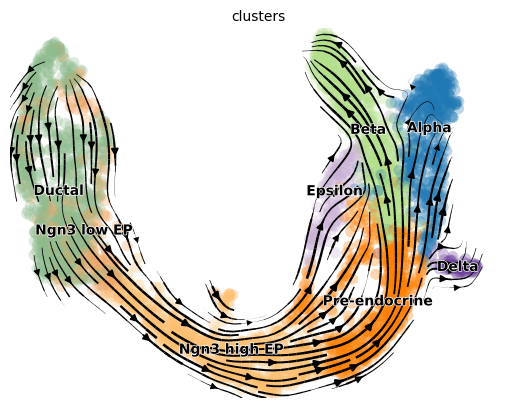

In [7]:
scv.pl.velocity_embedding_stream(total, 
                                 recompute=True,
                                 color="clusters", 
                                 dpi=100)